# Graph generator
Regenerate specific graphs based on the csv's outputted by the Master Overview.

In [196]:
import pandas as pd
from util import plot_scores, get_vdjdb
from pprint import pprint
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [197]:
df = get_vdjdb()
df.head()

C:\Users\arnod\PycharmProjects\thesis\util\epitopes.py:6: DtypeWarning: Columns (20,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vdjdb = pd.read_csv('data/vdjdb-2022-03-30/vdjdb_full.txt', sep='\t')


,epitope,CDR3_alpha,TRAV,TRAJ,CDR3_beta,TRBV,TRBJ
0,FLKEKGGL,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01
1,FLKEKGGL,NaN,NaN,NaN,CASSFEAGQGFFSNQPQHF,TRBV13*01,TRBJ1-5*01
2,FLKEKGGL,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01
3,FLKEKGGL,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,TRBJ1-5*01
4,FLKEKGGL,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01


In [198]:
# get the number of unique epitopes
len(df['epitope'].unique())

1150

In [199]:
# print the min and max samples per epitope
epitope_counts = df['epitope'].value_counts()
print(epitope_counts.min())
print(epitope_counts.max())

1
13974


C:\Users\arnod\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='epitope', ylabel='Density'>

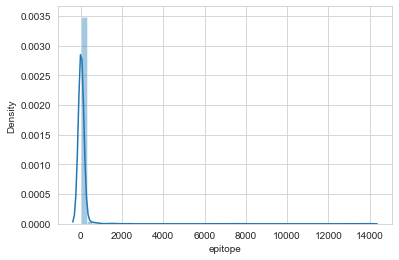

In [200]:
# plot the distribution of samples per epitope
sns.distplot(epitope_counts)

C:\Users\arnod\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='epitope'>

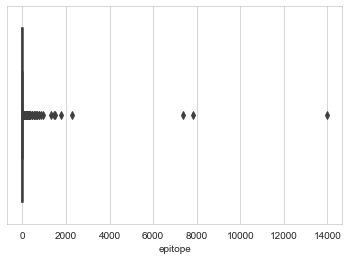

In [201]:
# boxplot
sns.boxplot(epitope_counts)

C:\Users\arnod\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arnod\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='epitope', ylabel='Density'>

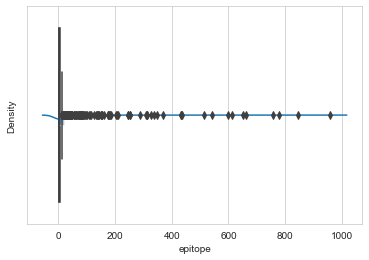

In [202]:
# distplot < 1000
sns.distplot(epitope_counts[epitope_counts < 1000])
sns.boxplot(epitope_counts[epitope_counts < 1000])

In [203]:
# get avereage number of samples per epitope
print(epitope_counts.mean())
# median
print(epitope_counts.median())

52.221739130434784
2.0


C:\Users\arnod\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arnod\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='epitope', ylabel='Density'>

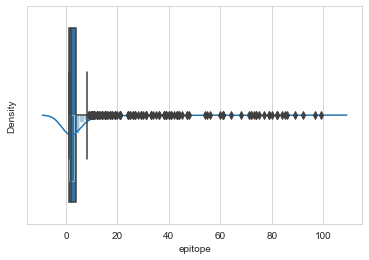

In [204]:
# distplot < 100
sns.distplot(epitope_counts[epitope_counts < 100])
sns.boxplot(epitope_counts[epitope_counts < 100])

C:\Users\arnod\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\arnod\AppData\Local\Temp/ipykernel_12252/3954375485.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels([int(10**x) for x in plot.get_xticks()])


[Text(-1.0, 0, '0'),
 Text(0.0, 0, '1'),
 Text(1.0, 0, '10'),
 Text(2.0, 0, '100'),
 Text(3.0, 0, '1000'),
 Text(4.0, 0, '10000'),
 Text(5.0, 0, '100000')]

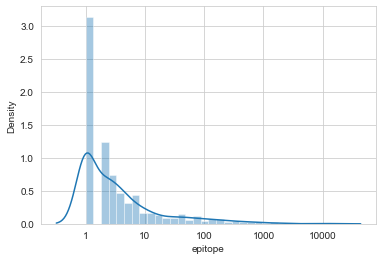

In [205]:
# log distplot?
plot = sns.distplot(epitope_counts.apply(np.log10))
# undo log for xticks
# plot.set_xticklabels([int(np.exp(x)) for x in plot.get_xticks()])
plot.set_xticklabels([int(10**x) for x in plot.get_xticks()])

In [ ]:
plot =

C:\Users\arnod\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\arnod\AppData\Local\Temp/ipykernel_12252/305168233.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels([int(10**x) for x in plot.get_xticks()])


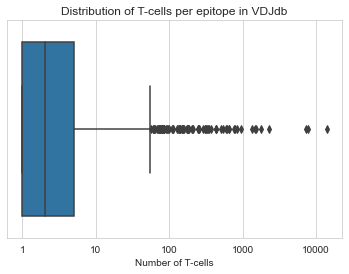

In [206]:
plot =  sns.boxplot(epitope_counts.apply(np.log10))
# plot.set_xticklabels([int(np.exp(x)) for x in plot.get_xticks()])
plot.set_xticklabels([int(10**x) for x in plot.get_xticks()])
title = "Distribution of T-cells per epitope in VDJdb"
plt.title(title)
plt.xlabel("Number of T-cells")
# save fig to "graphs" folder
plt.savefig("graphs/" + title + ".png")

In [207]:
# check if CDR_alpha is not Nan
df["has_alpha"] = df["CDR3_alpha"].apply(lambda x: not pd.isnull(x))
df["has_beta"] = df["CDR3_beta"].apply(lambda x: not pd.isnull(x))
df["alpha_only"] = df["has_alpha"] & ~df["has_beta"]
df["beta_only"] = df["has_beta"] & ~df["has_alpha"]
df["alpha_beta"] = df["has_alpha"] & df["has_beta"]

In [208]:
# create a dataframe with columns "epitope", "num_samples", "num_alpha_only", "num_beta_only", "num_alpha_beta", "fraction_alpha_only", "fraction_beta_only", "fraction_alpha_beta"
epitope_counts = df.groupby("epitope").agg({"has_alpha": "sum", "has_beta": "sum", "alpha_only": "sum", "beta_only": "sum", "alpha_beta": "sum"})
epitope_counts["num_samples"] = df.groupby("epitope").size()
epitope_counts["fraction_alpha_only"] = epitope_counts["alpha_only"] / epitope_counts["num_samples"]
epitope_counts["fraction_beta_only"] = epitope_counts["beta_only"] / epitope_counts["num_samples"]
epitope_counts["fraction_alpha_beta"] = epitope_counts["alpha_beta"] / epitope_counts["num_samples"]
epitope_counts["epitope"] = epitope_counts.index

ep_backup = epitope_counts.copy()

epitope_counts.head()

,has_alpha,has_beta,alpha_only,beta_only,alpha_beta,num_samples,fraction_alpha_only,fraction_beta_only,fraction_alpha_beta,epitope
epitope,,,,,,,,,,
AAFKRSCLK,5,5,0,0,5,5,0.0,0.0,1.0,AAFKRSCLK
AAGIGILTV,8,8,0,0,8,8,0.0,0.0,1.0,AAGIGILTV
AALALLLLDRLNQLE,3,3,0,0,3,3,0.0,0.0,1.0,AALALLLLDRLNQLE
AALPILFQV,1,1,0,0,1,1,0.0,0.0,1.0,AALPILFQV
AAVVRFQEAANKQKQ,2,2,0,0,2,2,0.0,0.0,1.0,AAVVRFQEAANKQKQ


C:\Users\arnod\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


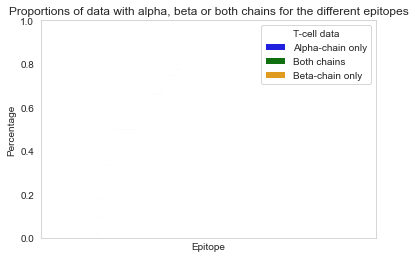

In [209]:
# Reshape the DataFrame for plotting
# melted_df = epitope_counts.melt(id_vars="epitope", value_vars=["fraction_alpha_only", "fraction_beta_only", "fraction_alpha_beta"])

# sort the data on beta only
# ep_backup = epitope_counts.copy()
# epitope_counts = ep_backup
# epitope_counts = epitope_counts.sample(100)
epitope_counts = epitope_counts.sort_values("fraction_beta_only", ascending=False)

sns.barplot(
    data=epitope_counts,
    x="epitope",
    y="fraction_alpha_only",
    color="blue",
    label="Alpha-chain only"
)

sns.barplot(
    data=epitope_counts,
    x="epitope",
    y="fraction_alpha_beta",
    color="green",
    label="Both chains",
    bottom=epitope_counts["fraction_alpha_only"]
)

sns.barplot(
    data=epitope_counts,
    x="epitope",
    y="fraction_beta_only",
    color="orange",
    label="Beta-chain only",
    bottom=epitope_counts["fraction_alpha_only"] + epitope_counts["fraction_alpha_beta"]
)


plt.xlabel("Epitope")
plt.ylabel("Percentage")
plt.title("Proportions of data with alpha, beta or both chains for the different epitopes")
plt.legend(title="T-cell data")
# hide all xticks
plt.xticks([])
# plt.xticks(rotation=90)
plt.show()

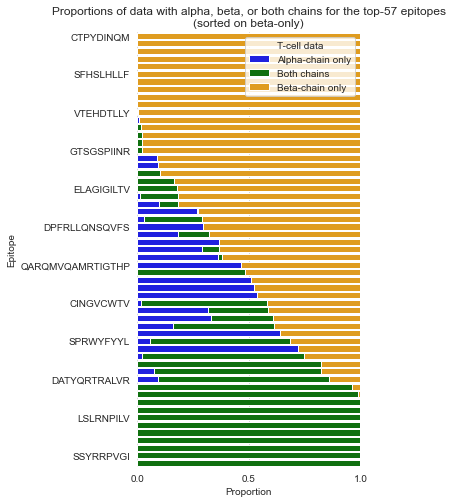

In [244]:
# epitope_counts = ep_backup
# epitope_counts = ep_backup
# get only the top 50 num_samples
epitope_counts = epitope_counts.sort_values("num_samples", ascending=False)
epitope_counts = epitope_counts.head(57)
# epitope_counts["constant"] = 0
epitope_counts = epitope_counts.sort_values("fraction_beta_only", ascending=False)

# portrait plot
plt.figure(figsize=(4, 8))

sns.barplot(
    data=epitope_counts,
    x="fraction_alpha_only",
    y="epitope",
    color="blue",
    label="Alpha-chain only"
)

sns.barplot(
    data=epitope_counts,
    x="fraction_alpha_beta",
    y="epitope",
    color="green",
    label="Both chains",
    left=epitope_counts["fraction_alpha_only"]
)
sns.barplot(
    data=epitope_counts,
    x="fraction_beta_only",
    y="epitope",
    color="orange",
    label="Beta-chain only",
    left=epitope_counts["fraction_alpha_only"] + epitope_counts["fraction_alpha_beta"]
)

sns.despine(left=True, bottom=True)

plt.xlabel("Proportion")
plt.ylabel("Epitope")
title = "Proportions of data with alpha, beta, or both chains for the top-57 epitopes (sorted on beta-only)"
plt.title("Proportions of data with alpha, beta, or both chains for the top-57 epitopes\n(sorted on beta-only)")
plt.legend(title="T-cell data")
# plt.yticks(rotation=90)
# only keep one every 5 ticks
locs, labels = plt.yticks()
locs = [loc for i, loc in enumerate(locs) if i % 5 == 0]
labels = [label for i, label in enumerate(labels) if i % 5 == 0]

plt.yticks(locs, labels)

# set ytick color to black
# plt.tick_params(axis='y', colors='black',  direction='in', length=6, width=1)
# set xtick color to black


# show a small tick on the y axis at the bar the displayed y labels belong to
# plt.tick_params(axis='y', which='major', pad=15, length=8, width=4)

# hide all xticks, except 0, 0.5, 1
plt.xticks([0, 0.5, 1])
# save fig to "graphs" folder
plt.savefig("graphs/" + title + ".png", bbox_inches='tight')
plt.show()

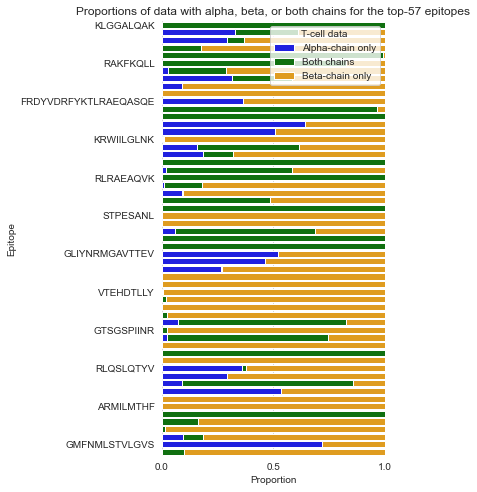

In [245]:
epitope_counts = epitope_counts.sort_values("num_samples", ascending=False)
epitope_counts = epitope_counts.head(57)
# epitope_counts["constant"] = 0
# epitope_counts = epitope_counts.sort_values("fraction_beta_only", ascending=False)

# portrait plot
plt.figure(figsize=(4, 8))

sns.barplot(
    data=epitope_counts,
    x="fraction_alpha_only",
    y="epitope",
    color="blue",
    label="Alpha-chain only"
)

sns.barplot(
    data=epitope_counts,
    x="fraction_alpha_beta",
    y="epitope",
    color="green",
    label="Both chains",
    left=epitope_counts["fraction_alpha_only"]
)
sns.barplot(
    data=epitope_counts,
    x="fraction_beta_only",
    y="epitope",
    color="orange",
    label="Beta-chain only",
    left=epitope_counts["fraction_alpha_only"] + epitope_counts["fraction_alpha_beta"]
)

sns.despine(left=True, bottom=True)

plt.xlabel("Proportion")
plt.ylabel("Epitope")
title = "Proportions of data with alpha, beta, or both chains for the top-57 epitopes"
plt.title(title)
plt.legend(title="T-cell data")
# plt.yticks(rotation=90)
# only keep one every 5 ticks
locs, labels = plt.yticks()
locs = [loc for i, loc in enumerate(locs) if i % 5 == 0]
labels = [label for i, label in enumerate(labels) if i % 5 == 0]

plt.yticks(locs, labels)
# hide all xticks, except 0, 0.5, 1
plt.xticks([0, 0.5, 1])

# save fig to "graphs" folder
plt.savefig("graphs/" + title + ".png", bbox_inches='tight')
plt.show()

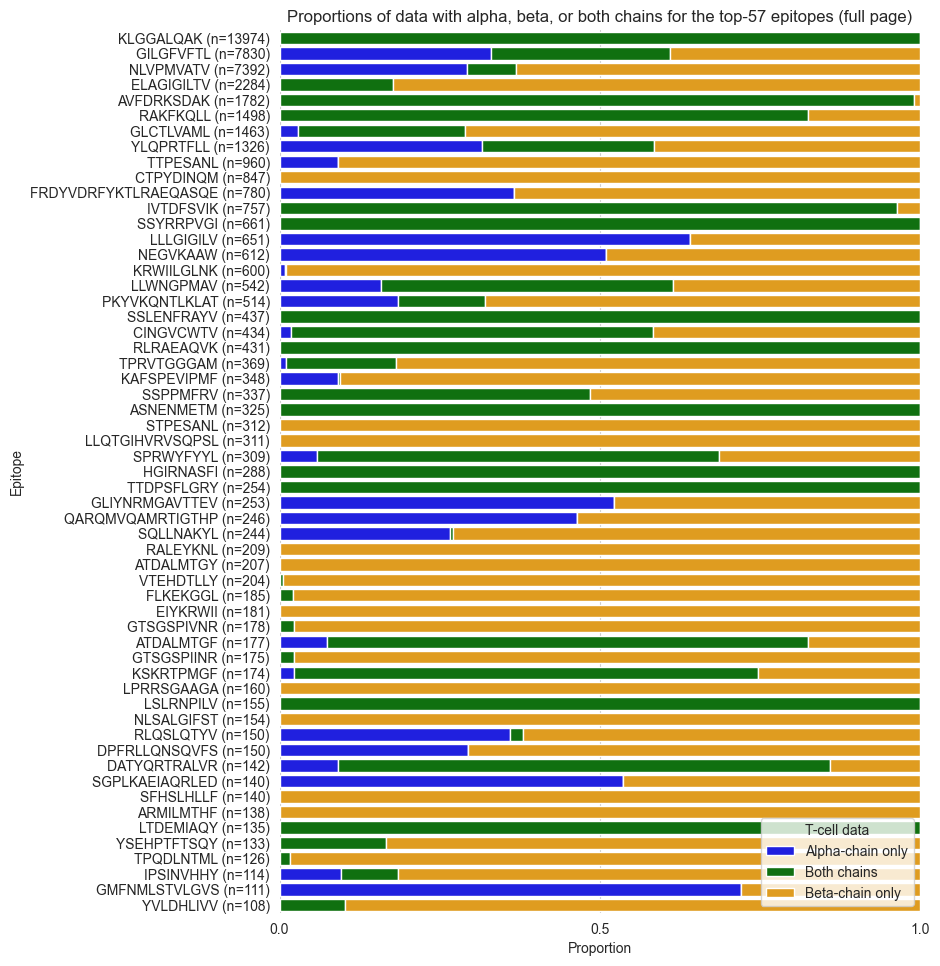

In [246]:
epitope_counts = epitope_counts.sort_values("num_samples", ascending=False)
epitope_counts = epitope_counts.head(57)
# epitope_counts["constant"] = 0
# epitope_counts = epitope_counts.sort_values("fraction_beta_only", ascending=False)

# figsize A4 (portrait)
plt.figure(figsize=(8.27, 11.69), dpi=100)

sns.barplot(
    data=epitope_counts,
    x="fraction_alpha_only",
    y="epitope",
    color="blue",
    label="Alpha-chain only"
)

sns.barplot(
    data=epitope_counts,
    x="fraction_alpha_beta",
    y="epitope",
    color="green",
    label="Both chains",
    left=epitope_counts["fraction_alpha_only"]
)
sns.barplot(
    data=epitope_counts,
    x="fraction_beta_only",
    y="epitope",
    color="orange",
    label="Beta-chain only",
    left=epitope_counts["fraction_alpha_only"] + epitope_counts["fraction_alpha_beta"]
)

sns.despine(left=True, bottom=True)

plt.xlabel("Proportion")
plt.ylabel("Epitope")
title = "Proportions of data with alpha, beta, or both chains for the top-57 epitopes (full page)"
plt.title(title)
plt.legend(title="T-cell data")
# plt.yticks(rotation=90)
# only keep one every 5 ticks
# locs, labels = plt.yticks()
# locs = [loc for i, loc in enumerate(locs) if i % 5 == 0]
# labels = [label for i, label in enumerate(labels) if i % 5 == 0]

# for each y label, add num_samples after the label
locs, labels = plt.yticks()
for i, label in enumerate(labels):
    # get the epitope name
    epitope = label.get_text()
    # get the number of samples for this epitope
    num_samples = epitope_counts[epitope_counts["epitope"] == epitope]["num_samples"].values[0]
    # add the number of samples to the label
    label.set_text(f"{epitope} (n={num_samples})")

plt.yticks(locs, labels)

# plt.yticks(locs, labels)
# hide all xticks, except 0, 0.5, 1
plt.xticks([0, 0.5, 1])
# save fig to "graphs" folder
plt.savefig("graphs/" + title + ".png", bbox_inches='tight')
plt.show()

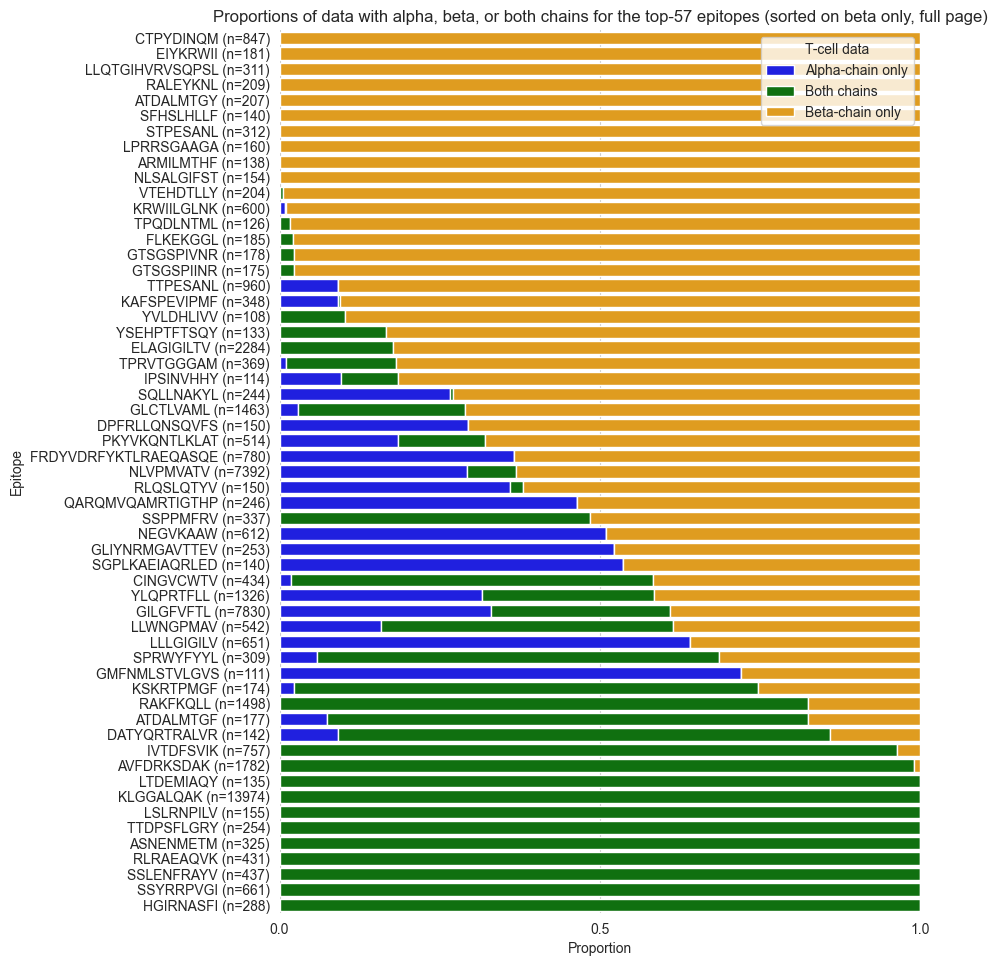

In [247]:
epitope_counts = epitope_counts.sort_values("num_samples", ascending=False)
epitope_counts = epitope_counts.head(57)
# epitope_counts["constant"] = 0
epitope_counts = epitope_counts.sort_values("fraction_beta_only", ascending=False)

# figsize A4 (portrait)
plt.figure(figsize=(8.27, 11.69), dpi=100)

sns.barplot(
    data=epitope_counts,
    x="fraction_alpha_only",
    y="epitope",
    color="blue",
    label="Alpha-chain only"
)

sns.barplot(
    data=epitope_counts,
    x="fraction_alpha_beta",
    y="epitope",
    color="green",
    label="Both chains",
    left=epitope_counts["fraction_alpha_only"]
)
sns.barplot(
    data=epitope_counts,
    x="fraction_beta_only",
    y="epitope",
    color="orange",
    label="Beta-chain only",
    left=epitope_counts["fraction_alpha_only"] + epitope_counts["fraction_alpha_beta"]
)

sns.despine(left=True, bottom=True)

plt.xlabel("Proportion")
plt.ylabel("Epitope")
title = "Proportions of data with alpha, beta, or both chains for the top-57 epitopes (sorted on beta only, full page)"
plt.title(title)
plt.legend(title="T-cell data")
# plt.yticks(rotation=90)
# only keep one every 5 ticks
# locs, labels = plt.yticks()
# locs = [loc for i, loc in enumerate(locs) if i % 5 == 0]
# labels = [label for i, label in enumerate(labels) if i % 5 == 0]

# for each y label, add num_samples after the label
locs, labels = plt.yticks()
for i, label in enumerate(labels):
    # get the epitope name
    epitope = label.get_text()
    # get the number of samples for this epitope
    num_samples = epitope_counts[epitope_counts["epitope"] == epitope]["num_samples"].values[0]
    # add the number of samples to the label
    label.set_text(f"{epitope} (n={num_samples})")

plt.yticks(locs, labels)

# plt.yticks(locs, labels)
# hide all xticks, except 0, 0.5, 1
plt.xticks([0, 0.5, 1])
# save fig to "graphs" folder
plt.savefig("graphs/" + title + ".png", bbox_inches='tight')
plt.show()

In [212]:
# get the min and max num_samples
min_num_samples = epitope_counts["num_samples"].min()
max_num_samples = epitope_counts["num_samples"].max()
# get the epitope rows with the min and max num_samples
min_num_samples_epitopes = epitope_counts[epitope_counts["num_samples"] == min_num_samples]
max_num_samples_epitopes = epitope_counts[epitope_counts["num_samples"] == max_num_samples]

pd.concat([min_num_samples_epitopes, max_num_samples_epitopes])

,has_alpha,has_beta,alpha_only,beta_only,alpha_beta,num_samples,fraction_alpha_only,fraction_beta_only,fraction_alpha_beta,epitope
epitope,,,,,,,,,,
YVLDHLIVV,11,108,0,97,11,108,0.0,0.898148,0.101852,YVLDHLIVV
KLGGALQAK,13974,13974,0,0,13974,13974,0.0,0.000000,1.000000,KLGGALQAK


In [213]:
epitope_counts = ep_backup.copy()

## same plot, but with the 50 least occuring epitopes

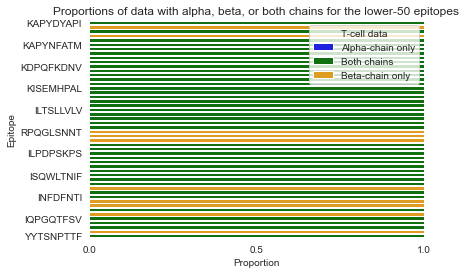

In [214]:
epitope_counts = epitope_counts.sort_values("num_samples", ascending=False)
epitope_counts = epitope_counts.tail(50)
# epitope_counts["constant"] = 0
# epitope_counts = epitope_counts.sort_values("fraction_beta_only", ascending=False)


sns.barplot(
    data=epitope_counts,
    x="fraction_alpha_only",
    y="epitope",
    color="blue",
    label="Alpha-chain only"
)

sns.barplot(
    data=epitope_counts,
    x="fraction_alpha_beta",
    y="epitope",
    color="green",
    label="Both chains",
    left=epitope_counts["fraction_alpha_only"]
)
sns.barplot(
    data=epitope_counts,
    x="fraction_beta_only",
    y="epitope",
    color="orange",
    label="Beta-chain only",
    left=epitope_counts["fraction_alpha_only"] + epitope_counts["fraction_alpha_beta"]
)

sns.despine(left=True, bottom=True)

plt.xlabel("Proportion")
plt.ylabel("Epitope")
title = "Proportions of data with alpha, beta, or both chains for the lower-50 epitopes"
plt.title(title)
plt.legend(title="T-cell data")
# plt.yticks(rotation=90)
# only keep one every 5 ticks
locs, labels = plt.yticks()
locs = [loc for i, loc in enumerate(locs) if i % 5 == 0 or i == 49]
labels = [label for i, label in enumerate(labels) if i % 5 == 0 or i == 49]

plt.yticks(locs, labels)
# hide all xticks, except 0, 0.5, 1
plt.xticks([0, 0.5, 1])
# save fig to "graphs" folder
plt.savefig("graphs/" + title + ".png", bbox_inches="tight")
plt.show()

In [215]:
# get the min and max num_samples
min_num_samples = epitope_counts["num_samples"].min()
max_num_samples = epitope_counts["num_samples"].max()
# get the epitope rows with the min and max num_samples
min_num_samples_epitopes = epitope_counts[epitope_counts["num_samples"] == min_num_samples]
max_num_samples_epitopes = epitope_counts[epitope_counts["num_samples"] == max_num_samples]

pd.concat([min_num_samples_epitopes, max_num_samples_epitopes])

,has_alpha,has_beta,alpha_only,beta_only,alpha_beta,num_samples,fraction_alpha_only,fraction_beta_only,fraction_alpha_beta,epitope
epitope,,,,,,,,,,
KAPYDYAPI,1,1,0,0,1,1,0.0,0.0,1.0,KAPYDYAPI
RILLVAASY,0,1,0,1,0,1,0.0,1.0,0.0,RILLVAASY
RIAAWMATY,1,1,0,0,1,1,0.0,0.0,1.0,RIAAWMATY
RLLQCTQQAV,0,1,0,1,0,1,0.0,1.0,0.0,RLLQCTQQAV
RHDLPPYRVYL,1,1,0,0,1,1,0.0,0.0,1.0,RHDLPPYRVYL
...,...,...,...,...,...,...,...,...,...,...
IQPGQTFSV,1,1,0,0,1,1,0.0,0.0,1.0,IQPGQTFSV
RLPAKAPLLGCG,1,1,0,0,1,1,0.0,0.0,1.0,RLPAKAPLLGCG
RLPAKAPLL,1,1,0,0,1,1,0.0,0.0,1.0,RLPAKAPLL


In [216]:
epitope_counts = ep_backup.copy()

In [217]:
#get the number of samples where num_smaples is 1
num_samples_1 = epitope_counts[epitope_counts["num_samples"] == 1]
print("Number of samples where num_samples is 1: " + str(len(num_samples_1)))

Number of samples where num_samples is 1: 467


In [218]:
# get the number of samples where num_samples is 2
num_samples_2 = epitope_counts[epitope_counts["num_samples"] == 2]
print("Number of samples where num_samples is 2: " + str(len(num_samples_2)))

Number of samples where num_samples is 2: 185


In [219]:
for i in range(1, 50):
    num_samples_i = epitope_counts[epitope_counts["num_samples"] == i]
    print("Number of samples where num_samples is " + str(i) + ": " + str(len(num_samples_i)))

Number of samples where num_samples is 1: 467
Number of samples where num_samples is 2: 185
Number of samples where num_samples is 3: 111
Number of samples where num_samples is 4: 70
Number of samples where num_samples is 5: 46
Number of samples where num_samples is 6: 19
Number of samples where num_samples is 7: 25
Number of samples where num_samples is 8: 20
Number of samples where num_samples is 9: 6
Number of samples where num_samples is 10: 19
Number of samples where num_samples is 11: 9
Number of samples where num_samples is 12: 4
Number of samples where num_samples is 13: 6
Number of samples where num_samples is 14: 6
Number of samples where num_samples is 15: 5
Number of samples where num_samples is 16: 5
Number of samples where num_samples is 17: 4
Number of samples where num_samples is 18: 2
Number of samples where num_samples is 19: 4
Number of samples where num_samples is 20: 1
Number of samples where num_samples is 21: 5
Number of samples where num_samples is 22: 0
Number 

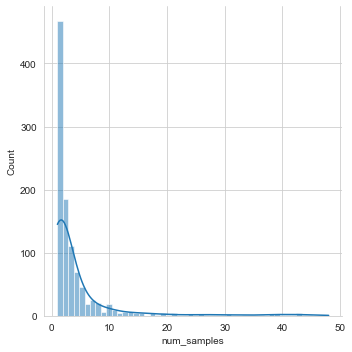

In [220]:
# plot this
sns.displot(
    data=epitope_counts[epitope_counts["num_samples"] < 50],
    x="num_samples",
    bins=50,
    kde=True
)

In [221]:
# number of samples with 10 or less samples
num_samples_10_or_less = epitope_counts[epitope_counts["num_samples"] <= 10]
print("Number of samples where num_samples is 10 or less: " + str(len(num_samples_10_or_less)))

Number of samples where num_samples is 10 or less: 968


In [222]:
# more than 100 samples
num_samples_100_or_more = epitope_counts[epitope_counts["num_samples"] > 100]
print("Number of samples where num_samples is 100 or more: " + str(len(num_samples_100_or_more)))

Number of samples where num_samples is 100 or more: 57


In [223]:
# of num_samples_100 or more, how many have fraction_alpha_only 1, how many have fraction_beta_only 1, how many have fraction_alpha_beta 1
for column  in ["fraction_alpha_only", "fraction_beta_only", "fraction_alpha_beta"]:
    print("Number of samples where " + column + " is 1: " + str(len(num_samples_100_or_more[num_samples_100_or_more[column] == 1])))

Number of samples where fraction_alpha_only is 1: 0
Number of samples where fraction_beta_only is 1: 10
Number of samples where fraction_alpha_beta is 1: 9
